# $M^2$ Measurements

** Scott Prahl**

** 24 Nov 2017 **

** Unfinished **

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import imread

import laserbeamsize as lbs

pixel_size_mm = 3.75/1000           # pixel size in mm for the camera

def z_rayleigh(w0,lambdaa):
    return np.pi * w0**2/lambdaa

def beam_radius(w0, z0, M2, lambdaa, z):
    zR = z_rayleigh(w0,lambdaa)
    return w0*np.sqrt(1 + M2**2 * ((z-z0)/zR)**2)

def focused_diameter(f,lambdaa,d):
    return 2*lambdaa * f / d

# Rayleigh Length $z_R$

The Rayleigh length $z_R$ is 
$$
z_R=\pi w_0^2/\lambda
$$
and is the distance from the beam waist to the point where the beam radius has increased by a factor of $\sqrt{2}$ (and therefore the area has doubled or the irradiance (power/area) has dropped 50%).

# Gaussian Beam Radius $w(z)$

It would seem that $w$ should stand for *width*, but it doesn't.  This means that $w$ is not the diameter but the radius.  Go figure.

The parameter $w$ is referred to as beam radius and depends on the location $z$ along the axis. At $z = z_0$ it reaches a minimum value $w_0$, called the beam waist. 
$$
w^2(z)=w_0^2\left(1+{(z-z_0)^2\over z_R^2}\right)
$$

The beam waist $w_0$ and its location $z_0$ determine the beam size everywhere (assuming, of course, that the wavelength is known).

## $M^2$ Beam propagation along optical axis

The number $M^2$ is the beam propagation factor.

The variation of the beam radius along the optical axis is given by
$$
w^2(z) = w_0^2\left[1 + \left(M^2\cdot{z-z_0\over z_R} \right)^2\right]
$$
which is the same equation as above when $M^2=1$.
A Gaussian beam has $M=1$, while all other beams will have $M>1$.  Moreover,
* for a given *beam radius*, the Gaussian beam has the smallest possible beam divergence
* for a given *beam divergence*, the Gaussian beam has the smallest possible beam radius. 

For an elliptical beam, the Rayleigh distance will differ in each case.  Thus
$$
w_x^2(z) = w_{0x}^2 +w_0^2 M_x^4\left({\lambda\over\pi w_{0x}^2}\right)^2(z-z_0)^2
$$
and
$$
w_y^2(z) = w_{0y}^2 +w_0^2 M_y^4\left({\lambda\over\pi w_{0y}^2}\right)^2(z-z_0)^2
$$
and there will be different $M^2$ values in the transverse $x$ and $y$ directions.


 We find that the multimode beam has a beam waist which is $M^2$ times larger than a fundamental Gaussian beam with the same beam divergence, or a beam divergence which is $M^2$ times larger than that of a fundamental Gaussian beam with the same beam waist.

## Beam Divergence $\theta$

The beam divergence is defined as
$$
\theta=\lim_{z\rightarrow\infty}{w(z)\over z}
$$
When $M^2=1$ (a Gaussian beam) then 
$$
\theta_{gaussian}=\lim_{z\rightarrow\infty}{w(z)\over z}={w_0\over z_R}
$$
Otherwise
$$
\theta_{real}=\lim_{z\rightarrow\infty}{w(z)\over z}=M^2{w_0\over z_R}
$$
and therefore $M^2$ represents how much more real beams diverge than pure Gaussian beams
$$
M^2 = {\theta_{real}\over\theta_{gaussian}}
$$
or
$$
\theta_{real}= M^2 \theta_{gaussian}
$$

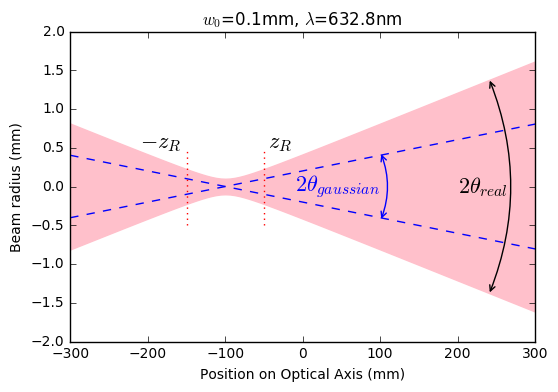

In [2]:
M2=2
w0=0.1                    # radius of beam waist [mm]
z0=-100                   # z-axis position of beam waist [mm]
lambdaa=0.6328/1000       # again in mm
zR=z_rayleigh(w0,lambdaa) # Rayleigh Distance

theta = w0/zR
z = np.linspace(-300,300,100)
plt.fill_between(z,-beam_radius(w0,z0,M2,lambdaa,z),beam_radius(w0,z0,M2,lambdaa,z),color='pink')

plt.plot(z,theta*(z-z0),'--b')
plt.plot(z,-theta*(z-z0),'--b')
#plt.plot([z0,z0],[-1,1],'--k')
plt.plot([zR+z0,zR+z0],[-1/2,1/2],':r')
plt.plot([-zR+z0,-zR+z0],[-1/2,1/2],':r')

plt.xlabel("Position on Optical Axis (mm)")
plt.ylabel("Beam radius (mm)")
plt.title("$w_0$=%.1fmm, $\lambda$=%.1fnm"%(w0,1e6*lambdaa))
#plt.annotate('$z_0$',xy=(0.99*z0,0.7),fontsize=16)
plt.annotate('$z_R$',xy=(0.9*(zR+z0),0.5),fontsize=16)
plt.annotate('$-z_R$',xy=(1.4*(-zR+z0),0.5),fontsize=16)

plt.annotate(r'$2\theta_{gaussian}$',xy=(-10,0),fontsize=16,va='center',color='blue')
plt.annotate('',xy=(100,0.45),xytext=(100,-0.45),arrowprops=dict(connectionstyle="arc3,rad=0.2", arrowstyle="<->",color='blue'))

plt.annotate(r'$2\theta_{real}$',xy=(200,0),fontsize=16,va='center')
plt.annotate('',xy=(240,1.4),xytext=(240,-1.4),arrowprops=dict(connectionstyle="arc3,rad=0.2", arrowstyle="<->"))
plt.show()

## Beam Parameter Product

Laser beam quality can be described by the beam parameter product (BPP) or
$$
BPP = w_0 \theta
$$
The BPP describes how well a beam can be focused to a spot.  For a Gaussian beam, the BPP only depends on the wavelength
$$
BPP = {\lambda\over\pi}
$$

## Experimental Concerns

### Distribute the beam measurements

The ISO 11146-1 document, "Lasers and laser-related equipment --- Test methods for laser beam widths, divergence angles and beam propagation, Part 1: Stigmatic and simple astigmatic beams" gives specific instructions for how to measure the $M^2$ value.

>If the beam waist is accessible for direct measurement, the beam waist location, beam widths, divergence angles and beam propagation ratios shall be determined by a hyperbolic fit to different measurements of the beam width along the propagation axis $z$. Hence, measurements at at least 10 different $z$ positions shall be taken. Approximately half of the measurements shall be distributed within one Rayleigh length on either side of the beam waist, and approximately half of them shall be distributed beyond two Rayleigh lengths from the beam waist. For simple astigmatic beams this procedure shall be applied separately for both principal directions.

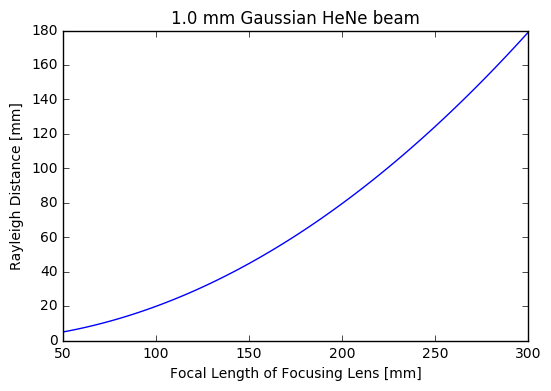

In [19]:
focal = np.linspace(50,300,100) #mm
d = 1 #mm
lambdaa = 632.8e-6 #mm

# expected radius for gaussian beam
w_gaussian = focused_diameter(focal,lambdaa,d)/2

plt.plot(focal,z_rayleigh(w_gaussian,lambdaa))
plt.xlabel("Focal Length of Focusing Lens [mm]")
plt.ylabel("Rayleigh Distance [mm]")
plt.title('%.1f mm Gaussian HeNe beam'%d)
plt.show()

### Make sure that the beam spot is large enough

The focal length $f$ of focusing lens will determine the minimum diameter of focused beam.  For a Gaussian beam, this will be
$$
d_0 = {2 \lambda f \lambda \over  d}
$$
where $d$ is the beam diameter on the lens.  This spotsize should cover a significant number of pixels.

Furthermore, to avoid spherical aberrations we would like to ensure that

> The f-number, defined as the lens focal length in mm divided by the beam diameter at the lens in mm is at least 10, and preferably over 20. --- [http://www-ferp.ucsd.edu/LASERLAB/TUTOR/m2.html]

As can be seen below, for longer focal length lenses, this is not an issue.

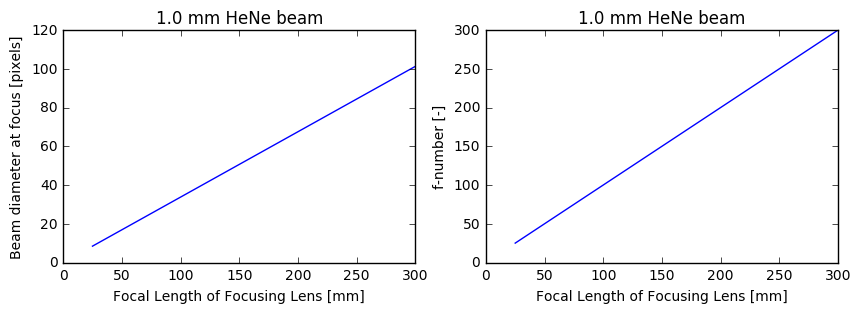

In [15]:
def focused_diameter(f,lambdaa,d):
    return 2*lambdaa * f / d

focal = np.linspace(25,300,100) #mm
d = 1 #mm
lambdaa = 632.8e-6 #mm

fig, ax = plt.subplots(1,2,figsize=(10,3))
plt.subplot(1,2,1)
plt.plot(focal,focused_diameter(focal,lambdaa,d)/pixel_size_mm)

plt.xlabel("Focal Length of Focusing Lens [mm]")
plt.ylabel("Beam diameter at focus [pixels]")
plt.title('%.1f mm HeNe beam'%d)

plt.subplot(1,2,2)
plt.plot(focal,focal/d)

plt.xlabel("Focal Length of Focusing Lens [mm]")
plt.ylabel("f-number [-]")
plt.title('%.1f mm HeNe beam'%d)

plt.show()